In [40]:
import geopandas as gpd
import numpy as np
import pandas as pd
import osmnx as ox

import os
print(os.getcwd())

import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

/Users/max/sync/cornell/2021_FA_Final_Project/spoke/notebooks/maxdumas


In [41]:
from spoke.graphing import SO_34_POLY

# Danger Metric Associations

Let's start by just computing the average danger for each census tract.

In [2]:
danger_df = pd.read_pickle('../../data/consolidated_danger_by_node_id.pkl.gz')
danger_df.head()

,DANGER,OLD_NODE_IDS,CENSUS_TRACT_ID
0,0.000000,[42421828],2800
1,4.722819,[42430942],2400
2,3.771228,[42430938],2800
3,0.000000,"[42421837, 5481976931, 5481976926]",2800
4,4.090534,"[42421877, 8475999052, 42433354, 42437949, 830...",6300


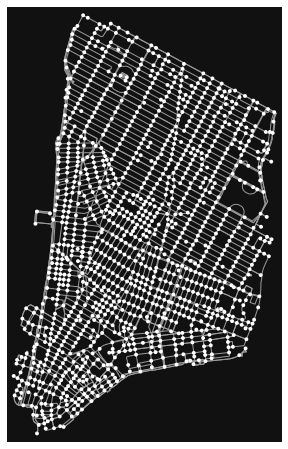

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
G = ox.io.load_graphml('../../data/consolidated_mnh_below_34th.graphml')
ox.plot.plot_graph(G)

In [4]:
tract_gdf = gpd.read_file('../../data/2010_Census_Tracts/geo_export_85c202c5-6ec9-493e-b0ec-a13efa26758d.shp')
tract_gdf.head()

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry
0,5,5000900,Staten Island,E,000900,9,SI22,West New Brighton-New Brighton-St. George,3903,2.497010e+06,7729.016794,"POLYGON ((-74.07921 40.64343, -74.07914 40.643..."
1,1,1009800,Manhattan,I,009800,98,MN19,Turtle Bay-East Midtown,3808,1.906016e+06,5534.200306,"POLYGON ((-73.96433 40.75638, -73.96479 40.755..."
2,1,1010200,Manhattan,I,010200,102,MN17,Midtown-Midtown South,3807,1.860993e+06,5687.802439,"POLYGON ((-73.97124 40.76094, -73.97170 40.760..."
3,1,1010400,Manhattan,I,010400,104,MN17,Midtown-Midtown South,3807,1.864600e+06,5693.036367,"POLYGON ((-73.97446 40.76229, -73.97491 40.761..."
4,1,1011300,Manhattan,I,011300,113,MN17,Midtown-Midtown South,3807,1.890907e+06,5699.860712,"POLYGON ((-73.98412 40.75484, -73.98460 40.754..."


In [42]:
from shapely.affinity import translate

offset = -0.001
mnh_street_angle = np.pi / 6 # Manhattan's streets are about 30 degrees off of true north.
clip_boundary = translate(SO_34_POLY, yoff=offset, xoff=np.sin(mnh_street_angle) * offset)

ns = pd.DataFrame(G.nodes.values())
ns = gpd.GeoDataFrame(data=ns, geometry=gpd.points_from_xy(ns.x, ns.y), crs='EPSG:32618').to_crs('EPSG:4326').clip(clip_boundary)
ns

,osmid_original,y,x,street_count,danger,lon,lat,highway,geometry
852,"[42436598, 2384399605]",4.510129e+06,586284.031653,NaN,4.195951127332553,NaN,NaN,NaN,POINT (-73.97810 40.73758)
1050,"[42442889, 3817756023]",4.510157e+06,586050.463038,NaN,4.142783062395247,NaN,NaN,NaN,POINT (-73.98086 40.73786)
1192,4389441146,4.510165e+06,586662.080013,3.0,0.0,-73.973618,40.737862,NaN,POINT (-73.97362 40.73786)
36,42422830,4.510178e+06,586525.553327,3.0,0.0,-73.975233,40.737994,NaN,POINT (-73.97523 40.73799)
1004,42440326,4.510188e+06,585815.652855,4.0,3.3510589519577363,-73.983638,40.738158,traffic_signals,POINT (-73.98364 40.73816)
...,...,...,...,...,...,...,...,...,...
290,42430007,4.507464e+06,583572.324893,4.0,0.0,-74.010567,40.713854,traffic_signals,POINT (-74.01057 40.71385)
1160,"[42453395, 373880031, 42453398, 246866806, 359...",4.507481e+06,583303.073174,NaN,4.344137016079125,NaN,NaN,NaN,POINT (-74.01375 40.71404)
1176,"[42459493, 4143838197]",4.507483e+06,583403.856238,NaN,0.0,NaN,NaN,NaN,POINT (-74.01256 40.71404)
207,272195271,4.507503e+06,583931.961045,4.0,3.5531775409202075,-74.006304,40.714173,traffic_signals,POINT (-74.00630 40.71417)


In [35]:
danger_by_tract_df = danger_df.loc[ns.index].groupby('CENSUS_TRACT_ID').mean()
danger_by_tract_df

,DANGER
CENSUS_TRACT_ID,
201,1.869849
202,2.457475
600,3.391251
700,1.900318
800,2.622768
...,...
10100,3.034775
10300,2.777648
31703,0.733920


In [36]:
tract_gdf['ct2010'] = tract_gdf['ct2010'].apply(int)
tract_danger_gdf = tract_gdf.query('boro_code == "1"').merge(danger_by_tract_df, how='inner', left_on='ct2010', right_index=True)
tract_danger_gdf

,boro_code,boro_ct201,boro_name,cdeligibil,ct2010,ctlabel,ntacode,ntaname,puma,shape_area,shape_leng,geometry,DANGER
485,1,1003001,Manhattan,E,3001,30.01,MN27,Chinatown,3809,1.344751e+06,4758.460704,"POLYGON ((-73.98382 40.72147, -73.98386 40.721...",2.971468
490,1,1001600,Manhattan,I,1600,16,MN27,Chinatown,3809,2.233320e+06,6391.788519,"POLYGON ((-73.98915 40.71671, -73.98975 40.715...",2.609471
569,1,1005501,Manhattan,I,5501,55.01,MN23,West Village,3810,1.338497e+06,4650.767227,"POLYGON ((-73.99657 40.72955, -73.99581 40.729...",1.401355
643,1,1007200,Manhattan,I,7200,72,MN20,Murray Hill-Kips Bay,3808,1.877429e+06,5722.943809,"POLYGON ((-73.97764 40.74639, -73.97812 40.745...",3.163063
651,1,1007400,Manhattan,I,7400,74,MN17,Midtown-Midtown South,3807,1.879420e+06,5726.157402,"POLYGON ((-73.98085 40.74775, -73.98134 40.747...",3.251057
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1963,1,1005502,Manhattan,I,5502,55.02,MN23,West Village,3810,1.243017e+06,4547.016128,"POLYGON ((-73.99155 40.72709, -73.99157 40.727...",2.493786
1973,1,1002400,Manhattan,E,2400,24,MN28,Lower East Side,3809,1.862478e+06,9194.919307,"MULTIPOLYGON (((-73.96715 40.71832, -73.96656 ...",2.195455
2033,1,1001501,Manhattan,I,1501,15.01,MN25,Battery Park City-Lower Manhattan,3810,2.814416e+06,9128.748152,"MULTIPOLYGON (((-73.99502 40.70315, -73.99505 ...",1.960174
2036,1,1000700,Manhattan,I,700,7,MN25,Battery Park City-Lower Manhattan,3810,2.439446e+06,9763.042777,"MULTIPOLYGON (((-73.99800 40.69880, -73.99802 ...",1.900318


<AxesSubplot:>

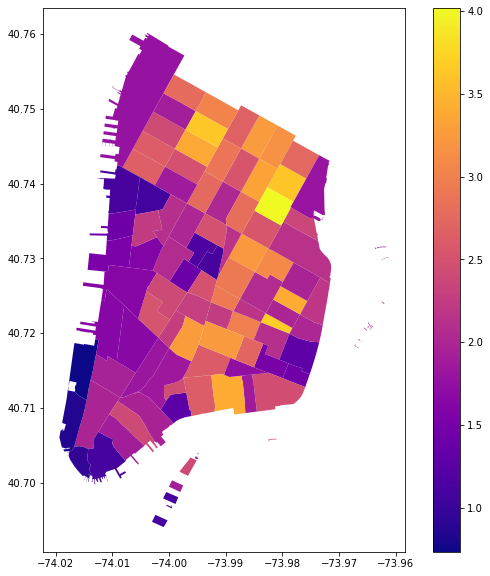

In [38]:
tract_danger_gdf.plot(column='DANGER', cmap='plasma', legend=True, figsize=(10, 10))